In [1]:
# Importation des librairies
from netCDF4 import Dataset
import numpy as np
import os as os
from mpl_toolkits.basemap import Basemap
import matplotlib.patheffects as PathEffects
import itertools
from itertools import chain
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pylab as p
from scipy.stats import skew, kurtosis
from matplotlib.transforms import Bbox
import sys
sys.path.insert(1, '../ERA')
from ERA_Fields import*

Model = 'Plasim'
area = 'France'
lon_start = 0
lon_end = 128
lat_start = 0 # latitudes start from 90 degrees North Pole
lat_end = 22


Months1 = [0, 0, 0, 0, 0, 0, 30, 30, 30, 30, 30, 0, 0, 0] 
Tot_Mon1 = list(itertools.accumulate(Months1))

t2m = Plasim_Field('tas','ANO_LONG_tas','Temperature', Model, lat_start, lat_end, lon_start, lon_end,'single','')
zg500 = Plasim_Field('zg','ANO_LONG_zg500','500 mbar Geopotential', Model, lat_start, lat_end, lon_start, lon_end,'single','')
mrso = Plasim_Field('mrso','ANO_LONG_mrso','soil moisture', Model, lat_start, lat_end, lon_start, lon_end,'single','')
t2m.years=8000
zg500.years=8000
mrso.years=8000

t2m.load_field('/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/Data_Plasim_LONG/')#('/local/gmiloshe/PLASIM/Data_Plasim_LONG/')
zg500.load_field('/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/Data_Plasim_LONG/')
mrso.load_field('/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/Data_Plasim_LONG/')
LON = t2m.LON
LAT = t2m.LAT

Trying to import basemap
Successfully imported basemap
Loading field tas
Loaded time array
input self.var.shape = (1200000, 22, 128)
output self.var.shape = (8000, 150, 22, 128)
self.time.shape = (8000, 150)
24.0 < np.diff(self.time) < 24.0
total time: (time.time() - start_time)

Loading field zg
Loaded time array
input self.var.shape = (1200000, 22, 128)
output self.var.shape = (8000, 150, 22, 128)
self.time.shape = (8000, 150)
24.0 < np.diff(self.time) < 24.0
total time: (time.time() - start_time)

Loading field mrso
Loaded time array
input self.var.shape = (1200000, 22, 128)
output self.var.shape = (8000, 150, 22, 128)
self.time.shape = (8000, 150)
24.0 < np.diff(self.time) < 24.0
total time: (time.time() - start_time)



/tmp/ipykernel_14851/2403605470.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=coords[2],height=coords[3],resolution='l',projection='aea',lat_ts=60,lat_0=coords[0],lon_0=coords[1])


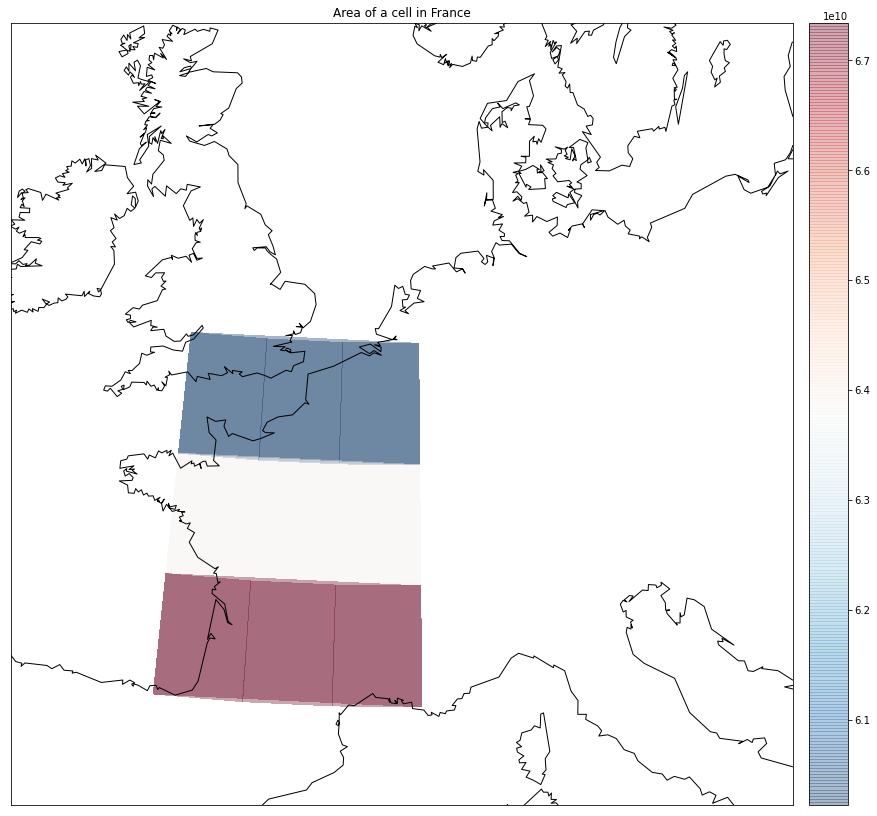

In [2]:
LON_mask = create_mask(Model,area,LON)
LAT_mask = create_mask(Model,area,LAT)
# Load the land area mask
dataset = Dataset('Data_Plasim_inter/CONTROL_lsmask.nc')
lsm = dataset.variables['lsm'][0]
dataset.close()
# Load the areas of each cell
dataset = Dataset('Data_Plasim_inter/CONTROL_gparea.nc')
cell_area = dataset.variables["cell_area"][:]
dataset.close()
mask_ocean = np.array(lsm)
mask_area = np.array(create_mask(Model,area, lsm))

coords = [50, 5., 2000000, 2000000]
fig = plt.figure(figsize=(15, 15), edgecolor='w')
m = Basemap(width=coords[2],height=coords[3],resolution='l',projection='aea',lat_ts=60,lat_0=coords[0],lon_0=coords[1])
m.pcolormesh(Greenwich(LON_mask), Greenwich(LAT_mask), Greenwich(create_mask(Model,area,cell_area)), latlon=True, alpha = .35, cmap='RdBu_r')
plt.title("Area of a cell in France")
m.colorbar()
m.drawcoastlines()
plt.show()

/tmp/ipykernel_14851/1401656546.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=coords[2],height=coords[3],resolution='l',projection='aea',lat_ts=60,lat_0=coords[0],lon_0=coords[1])


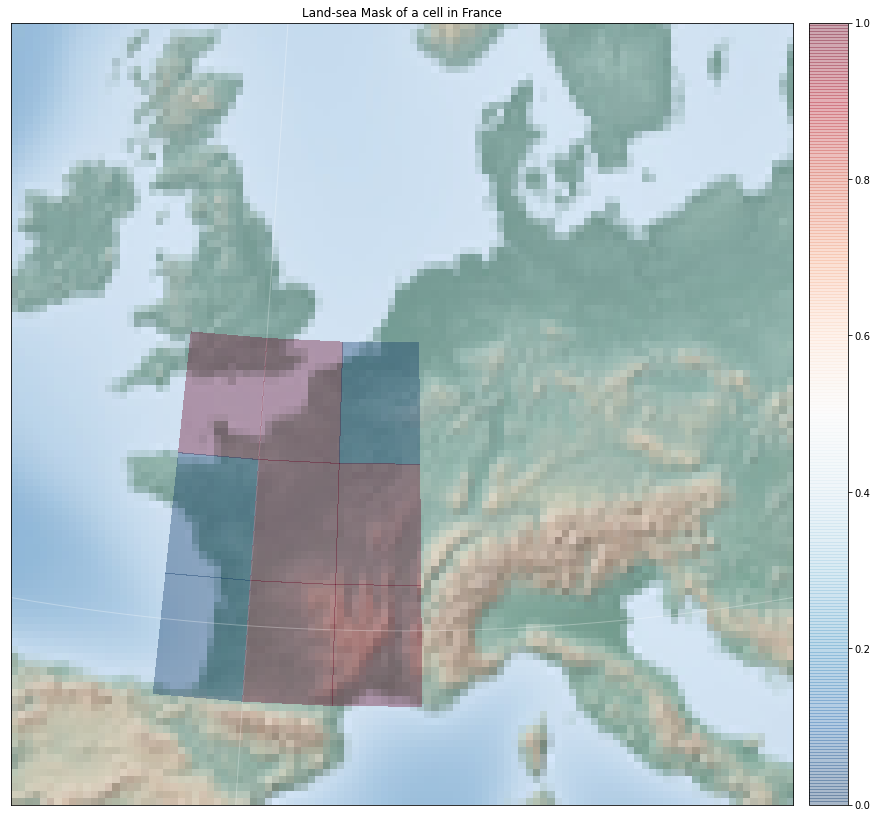

In [3]:
fig = plt.figure(figsize=(15, 15), edgecolor='w')
#m = Basemap(projection='nplaea',boundinglat=25,lon_0=0,resolution='c')
m = Basemap(width=coords[2],height=coords[3],resolution='l',projection='aea',lat_ts=60,lat_0=coords[0],lon_0=coords[1])
draw_map(m)
m.pcolormesh((LON_mask), (LAT_mask), (create_mask(Model,area,lsm)), latlon=True, alpha = .35, cmap='RdBu_r')
plt.title("Land-sea Mask of a cell in "+area)
m.colorbar()
plt.show()

In [4]:
mask = create_mask(Model,area,cell_area)*create_mask(Model,area,lsm)  
mask = mask/np.sum(np.sum(mask))  # Here I combine both grid-point area times the mask into a normalized mask
print(mask[-1,:])

[0.08987284333296675 0.08987284333296709 0.08987284333296704 0.0]


In [5]:
Tot_Mon1[5:9]

[0, 30, 60, 90]

mylon =  14.0625 , mylat =  46.044726631101675 , mylon_coor =  1699274.870070592 , mylat_coor =  602939.1433115646
0


/tmp/ipykernel_14851/3851476266.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='nplaea',boundinglat=30,lon_0=0,resolution='c')


NameError: name 'zg850' is not defined

<Figure size 2880x2880 with 0 Axes>

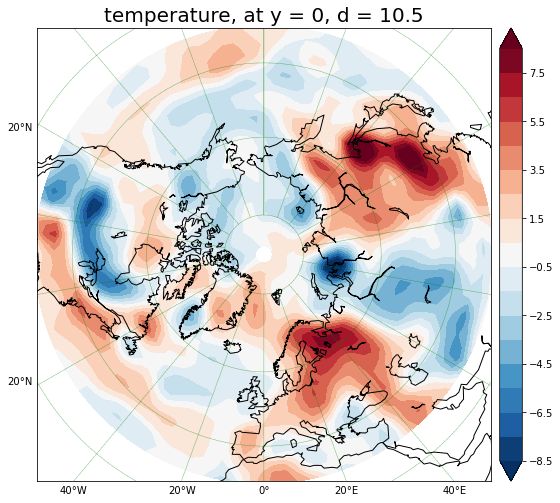

In [6]:
K = 273.15
y = 0
mylon_pixel = 5
mylat_pixel = 15
mylon = LON[mylat_pixel, mylon_pixel]
mylat = LAT[mylat_pixel, mylon_pixel]
mylon_coor, mylat_coor = m(mylon, mylat)
print("mylon = ",mylon,", mylat = ",mylat, ", mylon_coor = ",mylon_coor, ", mylat_coor = ", mylat_coor)

t2m.levels = np.linspace(-8.5, 8.5, 18)  # Levels to be used when plotting
zg500.levels = np.concatenate((np.arange(-10 * 20, 0, 10), np.arange(10, 10 * 21, 10))) 
fig2 = plt.figure(figsize=(40, 40))
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
iterate = 0
ax = []
fig2 = plt.figure(figsize=(40, 10))
for i,subplt in zip(Tot_Mon1[5:9],['141','142','143','144']):
    ax.append(fig2.add_subplot(spec2[0,iterate]))
    iterate = iterate + 1
    print(i)
    m = Basemap(projection='nplaea',boundinglat=30,lon_0=0,resolution='c')
    geo_contourf(m, ax[iterate-1], 0, Greenwich(LON), Greenwich(LAT), Greenwich(t2m.var[y,i,:,:]), t2m.levels, "RdBu_r", "temperature, at y = " + str(y)+", d = "+str(t2m.time[y,i]))
    geo_contour(m, ax[iterate-1], 0, Greenwich(LON), Greenwich(LAT), Greenwich(zg850.var[y,i,:,:]), zg500.levels, "PuRd", "summer")
  

In [ ]:
K = 273.15
y = 0
mylon_pixel = 5
mylat_pixel = 15
mylon = LON[mylat_pixel, mylon_pixel]
mylat = LAT[mylat_pixel, mylon_pixel]
mylon_coor, mylat_coor = m(mylon, mylat)
print("mylon = ",mylon,", mylat = ",mylat, ", mylon_coor = ",mylon_coor, ", mylat_coor = ", mylat_coor)

t2m.levels = np.linspace(-8.5, 8.5, 18)  # Levels to be used when plotting
zg500.levels = np.concatenate((np.arange(-10 * 20, 0, 10), np.arange(10, 10 * 21, 10))) 
fig2 = plt.figure(figsize=(40, 40))
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
iterate = 0
ax = []
fig2 = plt.figure(figsize=(40, 10))
for i,subplt in zip(Tot_Mon1[5:9],['141','142','143','144']):
    ax.append(fig2.add_subplot(spec2[0,iterate]))
    iterate = iterate + 1
    print(i)
    m = Basemap(projection='nplaea',boundinglat=30,lon_0=0,resolution='c')
    geo_contourf(m, ax[iterate-1], 0, Greenwich(LON), Greenwich(LAT), Greenwich(t2m.var[y,i,:,:]), t2m.levels, "RdBu_r", "temperature, at y = " + str(y)+", d = "+str(t2m.time[y,i]))
    geo_contour(m, ax[iterate-1], 0, Greenwich(LON), Greenwich(LAT), Greenwich(zg500.var[y,i,:,:]), zg500.levels, "PuRd", "summer")
  

In [7]:
t2m.abs_area_int, t2m.ano_area_int = t2m.Set_area_integral(area,mask,'PostprocLONG')
zg500.abs_area_int, zg500.ano_area_int = zg500.Set_area_integral(area,mask,'PostprocLONG')
mrso.abs_area_int, mrso.ano_area_int = mrso.Set_area_integral(area,mask,'PostprocLONG')

file PostprocLONG/Int_Abs__Plasim_France_ANO_LONG_tas.npy loaded
file PostprocLONG/Int_Ano_Abs__Plasim_France_ANO_LONG_tas.npy loaded
file PostprocLONG/Int_Abs__Plasim_France_ANO_LONG_zg500.npy loaded
file PostprocLONG/Int_Ano_Abs__Plasim_France_ANO_LONG_zg500.npy loaded
file PostprocLONG/Int_Abs__Plasim_France_ANO_LONG_mrso.npy loaded
file PostprocLONG/Int_Ano_Abs__Plasim_France_ANO_LONG_mrso.npy loaded


In [8]:
year_permutation = np.load('models/u1yrs100/1/year_permutation.npy')
year_permutation

array([45, 50, 99, 98, 97, 96, 94, 93, 90, 88, 24, 61, 91, 81, 87, 86, 85,
       84, 82, 78, 72, 73, 76, 77, 75, 71, 70, 69, 67, 66, 40, 56, 30, 92,
       65, 63, 62, 60, 59, 58, 31, 53, 79, 83, 57, 55, 54, 52, 51, 49,  0,
       32,  4, 80, 48, 47, 46, 44, 43, 41, 74, 64, 42, 11, 39, 38, 37, 36,
       35, 34, 95, 89,  6, 33, 28, 27, 26, 25, 23, 22, 29, 21, 20, 19, 18,
       17, 16, 15, 12,  5, 68, 14, 13, 10,  9,  8,  7,  3,  2,  1])

In [9]:
for varfield in [t2m, zg500, mrso]:
    varfield.var[range(len(year_permutation))] = varfield.var[year_permutation]
    varfield.abs_area_int[range(len(year_permutation))] = varfield.abs_area_int[year_permutation]

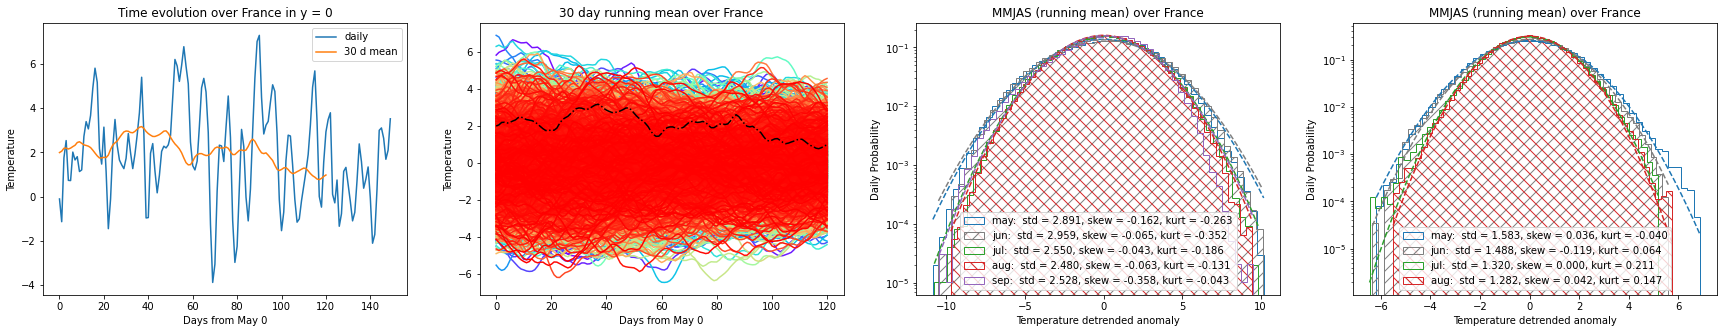

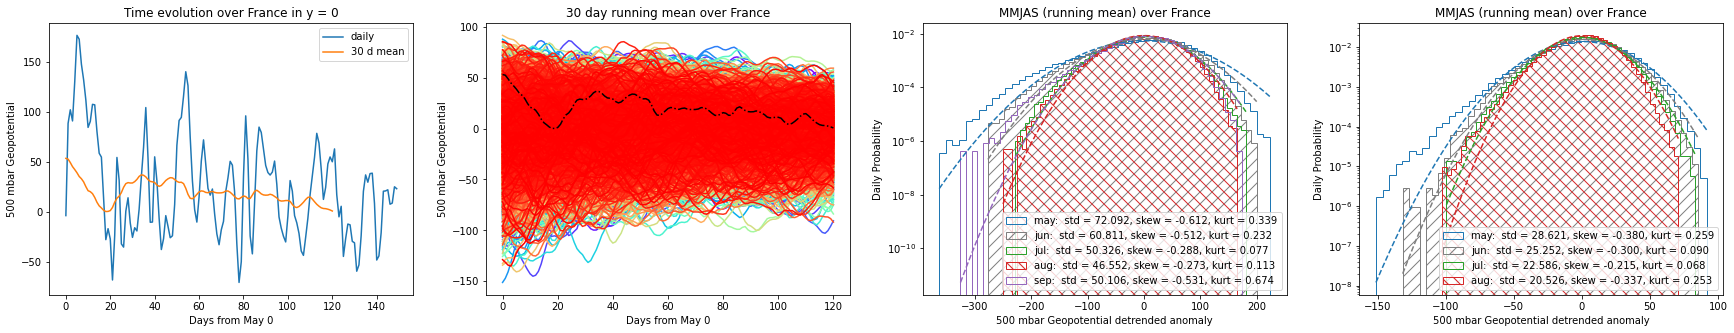

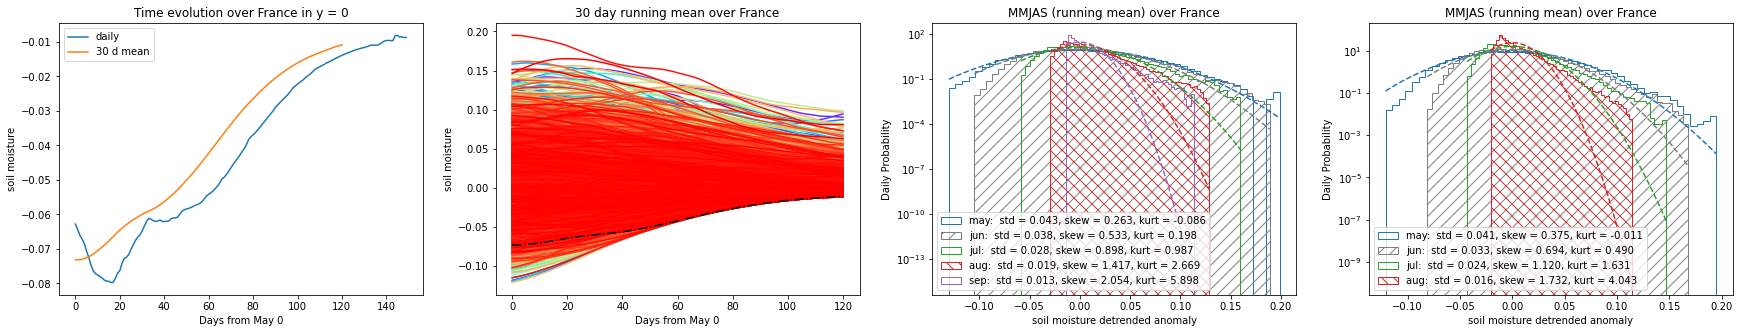

In [10]:
np.save('Postproc/'+Model+'_'+area+'_t2m', t2m.abs_area_int )
convseq = np.ones(30)/30
mycolors = ["tab:blue", "tab:gray", "tab:green", "tab:red", "tab:purple"]   # these colors are used to distinguish the months
monthhatches = ["","//","","\\\\",""]
mymonth = ["may", "jun", "jul", "aug", "sep"]
mylinewidth = [1, 1, 1, 1, 1]    # summer months should be more visible

for myfield in [t2m, zg500,mrso]:
    myyear = 0
    PltDistHist(myfield, convseq, mycolors, monthhatches, mymonth, mylinewidth, myyear, Tot_Mon1,area)

In [11]:
percent = 5
T = 14
A = np.zeros((8000, Tot_Mon1[9] - Tot_Mon1[6] - 13))   # When we use convolve (running mean) there is an extra point that we can generate by displacing the window hence 13 instead of 14
convseq = np.ones(T)/T
for y in range(8000):
    A[y,:]=np.convolve(t2m.abs_area_int[y,(Tot_Mon1[6]):(Tot_Mon1[9])],  convseq, mode='valid')
    
for myfield in [t2m, zg500]: 
    nb_events = 0
    myfieldvar = myfield.var[:,Tot_Mon1[6]:Tot_Mon1[9]  - T+1,:,:].reshape(((Tot_Mon1[9] - Tot_Mon1[6] - T+1)*8000,myfield.var.shape[2],myfield.var.shape[3]))
    print(myfieldvar.shape)
    A_reshape = A.reshape((A.shape[0]*A.shape[1]))
    threshold = np.sort(A_reshape)[np.ceil(A_reshape.shape[0]*(1-percent/100)).astype('int')]
    list_extremes = list(A_reshape >= threshold)
    myfield.myfieldvar_mean=np.mean(myfieldvar[list_extremes,:,:],0)
    myfield.myfieldvar_std_all=np.std(myfieldvar[:,:,:],0)
    myfield.myfieldvar_std=np.std(myfieldvar[list_extremes,:,:],0)
    nb_events = (list_extremes).count(True)
    myfield.myfieldvar_t = (lambda a, b: np.divide(a, b, out=np.zeros(a.shape), where=b != 0))(np.sqrt(nb_events) * myfield.myfieldvar_mean, myfield.myfieldvar_std)
    myfield.myfieldvar_mean_over_std = (lambda a, b: np.divide(a, b, out=np.zeros(a.shape), where=b != 0))(myfield.myfieldvar_mean, myfield.myfieldvar_std_all)
    print("threshold = ",threshold)

(616000, 22, 128)
threshold =  2.7585137443883085
(616000, 22, 128)
threshold =  2.7585137443883085


(616000,) (616000,)
(616000,) (616000,)
(616000,) (616000,)


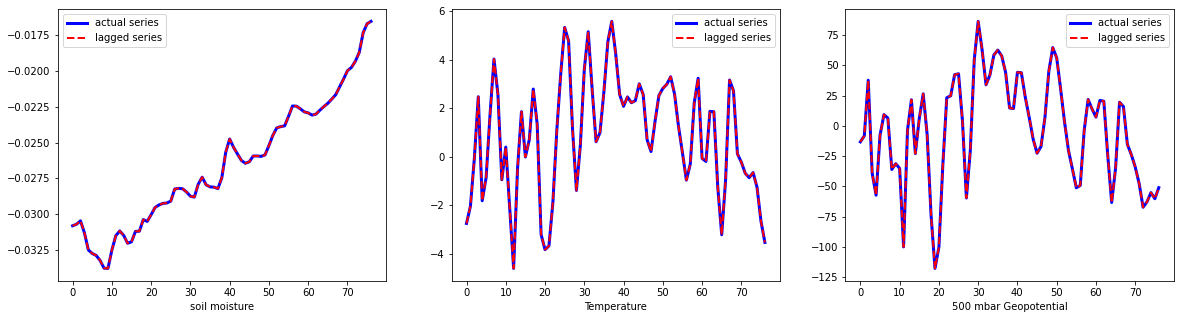

In [12]:
fig = plt.figure(figsize=(20,5))
for myfield, mysubplot in zip([mrso,t2m,zg500],[131,132,133]):
    myfield.abs_area_int_reshape = myfield.ReshapeInto1Dseries(area, mask, Tot_Mon1[6], Tot_Mon1[9], T, 0)
    print(myfield.abs_area_int_reshape.shape, A_reshape.shape)
    plt.subplot(mysubplot)
    plt.plot(myfield.abs_area_int[32,Tot_Mon1[6]:(Tot_Mon1[9] - T+1)],'b-',linewidth=3,label='actual series') # checking that the extraction of the summer series was done appropriately
    plt.plot(myfield.abs_area_int_reshape[77*32:77*33],'r--',linewidth=2,label='lagged series')
    plt.xlabel(myfield.label)
    plt.legend(loc="best")

Coef. of determ.  0.2659484107872628  +-  0.025346381158296644


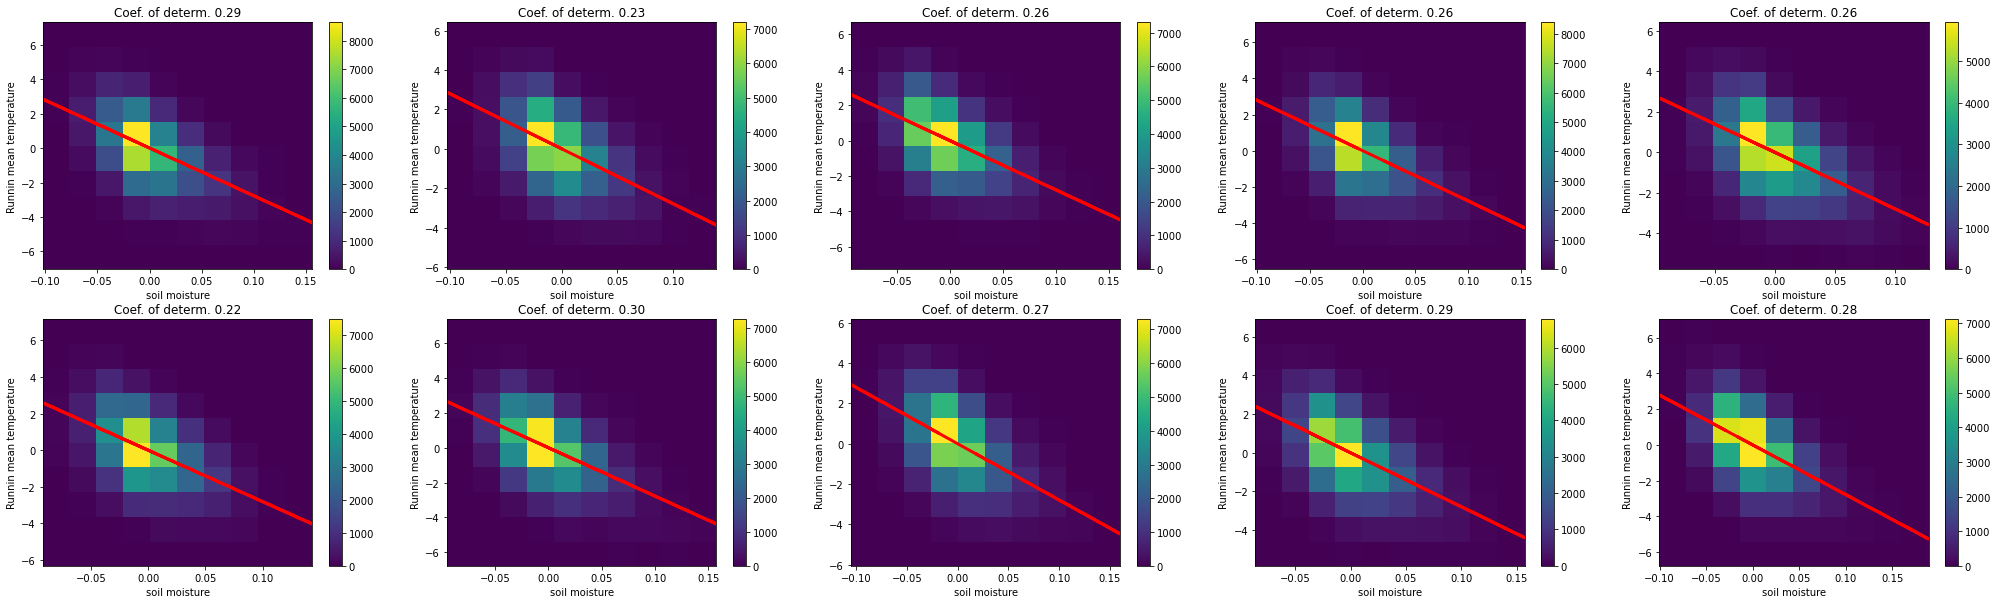

In [13]:
fig2 = plt.figure(figsize=(35, 10))
def PlotLinearRegression(Xname,R2,ax, X_test, y_test, y_pred):
    myhist = ax.hist2d(X_test[:,0], y_test)#, bins=20, cmap='Blues')
    cb = plt.colorbar(myhist[3], ax = ax)
    #plt.scatter(X_test, y_test,  color='black')
    ax.plot(X_test, y_pred, color='red', linewidth=3)
    ax.set_xlabel(Xname)
    ax.set_ylabel('Runnin mean temperature')
    ax.set_title('Coef. of determ. %.2f' % (R2))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)
R2 = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        X = mrso.abs_area_int_reshape[:,np.newaxis]
        Xname = 'soil moisture'
        X_test, X_train, y_test, y_train, regr, y_pred, R2[i] = SingleLinearRegression(i, X, A_reshape)
        ax = fig2.add_subplot(spec2[j, k])
        PlotLinearRegression(Xname,R2[i],ax, X_test, y_test, y_pred)
#fig2.savefig("Images_Linear/linear_regr_mrso_batch10.png", bbox_inches=full_extent(ax,.04).transformed(fig2.dpi_scale_trans.inverted()))
print('Coef. of determ. ', np.mean(R2), ' +- ', np.std(R2))

i:  0  , X_train.shape =  (554400, 1) , X_test.shape =  (61600, 1)  , a =  0  , b =  61600
Y_train positives =  27710 Y_train negatives =  526690  , Y_test positives =  3090  , Y_test negatives =  58510
loading Postproc/permutation_0_undersampling_10.npy
Y_train positives =  27710 Y_train negatives =  52669
type(X_train)= <class 'numpy.ndarray'>, type(X_test) = <class 'numpy.ndarray'>, type(Y_train) = <class 'list'>, type(Y_test) = <class 'list'>, type(X_train_new) = <class 'numpy.ndarray'>, type(Y_train_new) = <class 'list'>
X_train.shape = (554400, 1), X_test.shape = (61600, 1), len(Y_train) = 554400, len(Y_test) = 61600, X_train_new.shape = (80379, 1), len(Y_train_new) = 80379
MCC =  0.2373103450730332  , TP =  1565  , TN =  51207  , FP =  7303  , FN =  1525
MCC =  0.12654919172153498  , TP =  141  , TN =  58320  , FP =  190  , FN =  2949
renorm =  10 , MCC =  0.12654919172153498  ,entropy =  0.16436003847053368  ,entropy =  0.16436003847053368  , skill =  0.17205331086757092  ,BS =

Text(0, 0.5, 'Years')

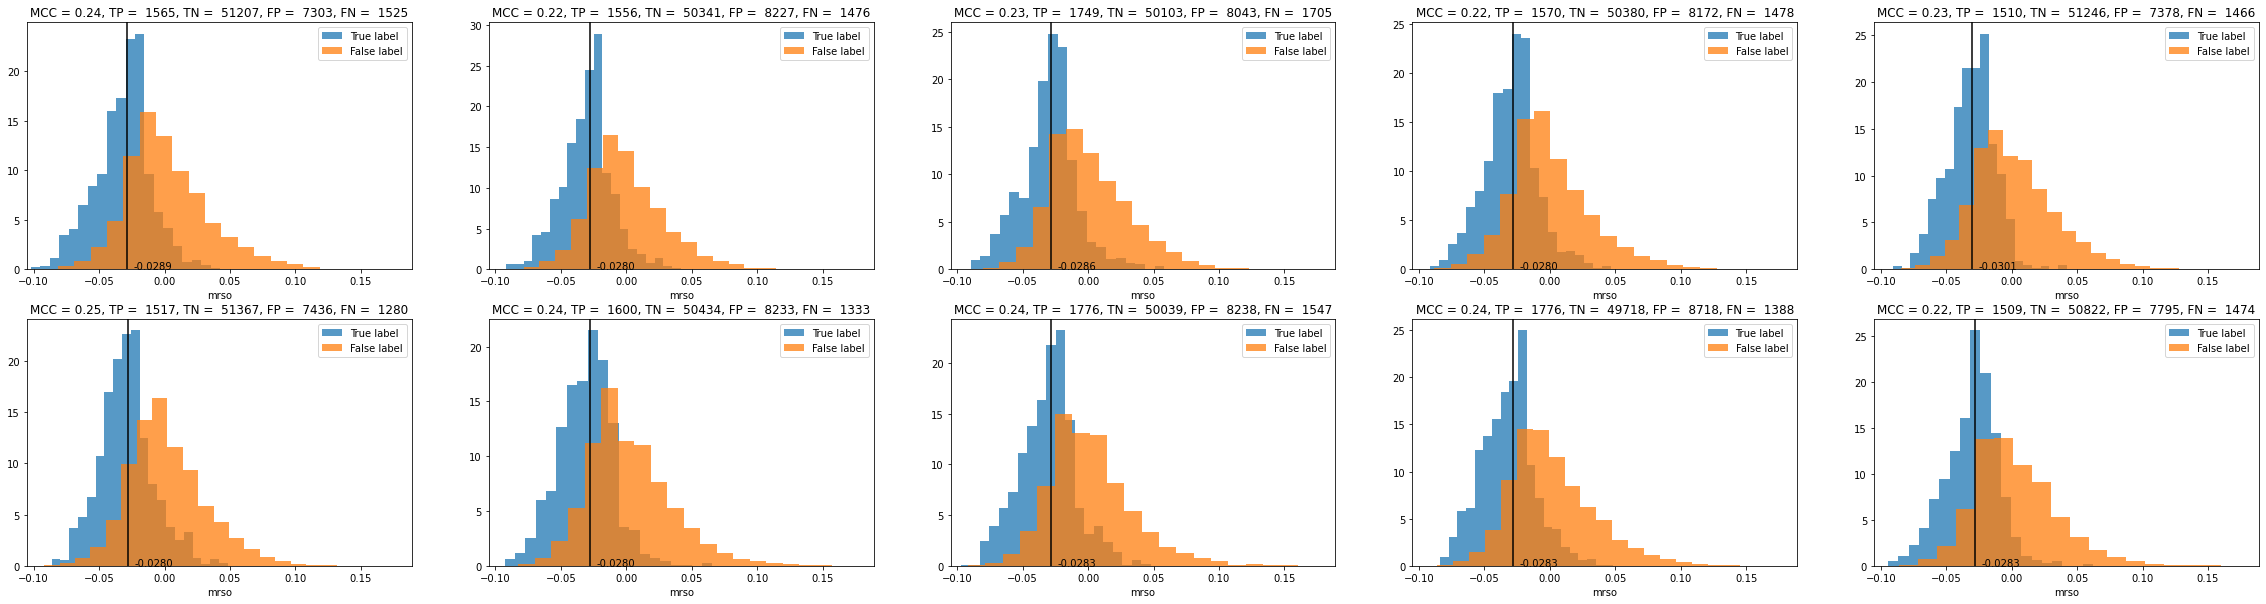

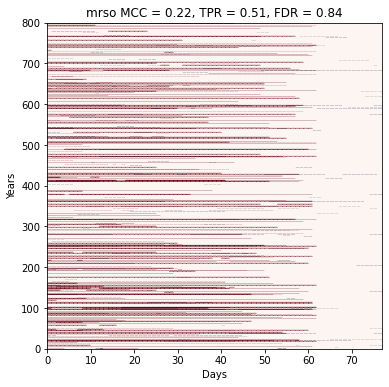

In [14]:
X = mrso.abs_area_int_reshape[:,np.newaxis]
Xname = 'mrso'
undersampling_factor = 10
labels = list_extremes
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)

Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,True)
        
        X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, undersampling_factor,True)# Split the data into training/testing sets
        #X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, 1,True)# Split the data into training/testing sets
        print(f'{type(X_train)= }, {type(X_test) = }, {type(Y_train) = }, {type(Y_test) = }, {type(X_train_new) = }, {type(Y_train_new) = }')
        print(f'{X_train.shape = }, {X_test.shape = }, {len(Y_train) = }, {len(Y_test) = }, {X_train_new.shape = }, {len(Y_train_new) = }')

        logreg = LogisticRegression(solver='sag',C=1e5)
        logreg.fit(X_train_new, Y_train_new)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)

        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)

        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 

        ax = fig2.add_subplot(spec2[j, k])
        PlotLogisticRegression(X,Xname,logreg,ax, X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
fig2.savefig("Images_Linear/logistic_regr_mrso_batch10.png", bbox_inches=full_extent(ax,.04).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
fig = plt.figure(figsize=(6,6))
plt.pcolormesh(np.array(Y_test).reshape(800,-1), cmap=plt.cm.Blues)
plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(800,-1), cmap=plt.cm.Reds,alpha=0.4)
plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
plt.xlabel('Days')
plt.ylabel('Years')

i:  0  , X_train.shape =  (554400, 1) , X_test.shape =  (61600, 1)  , a =  0  , b =  61600
Y_train positives =  27710 Y_train negatives =  526690  , Y_test positives =  3090  , Y_test negatives =  58510
loading Postproc/permutation_0_undersampling_10.npy
Y_train positives =  27710 Y_train negatives =  52669
type(X_train)= <class 'numpy.ndarray'>, type(X_test) = <class 'numpy.ndarray'>, type(Y_train) = <class 'list'>, type(Y_test) = <class 'list'>, type(X_train_new) = <class 'numpy.ndarray'>, type(Y_train_new) = <class 'list'>
X_train.shape = (554400, 1), X_test.shape = (61600, 1), len(Y_train) = 554400, len(Y_test) = 61600, X_train_new.shape = (80379, 1), len(Y_train_new) = 80379
MCC =  0.2522724328726112  , TP =  1672  , TN =  50968  , FP =  7542  , FN =  1418
MCC =  0.12180373575137418  , TP =  81  , TN =  58463  , FP =  47  , FN =  3009
renorm =  10 , MCC =  0.12180373575137418  ,entropy =  0.16341936352208436  ,entropy =  0.16341936352208436  , skill =  0.176791863598307  ,BS =  0.

Text(0, 0.5, 'Years')

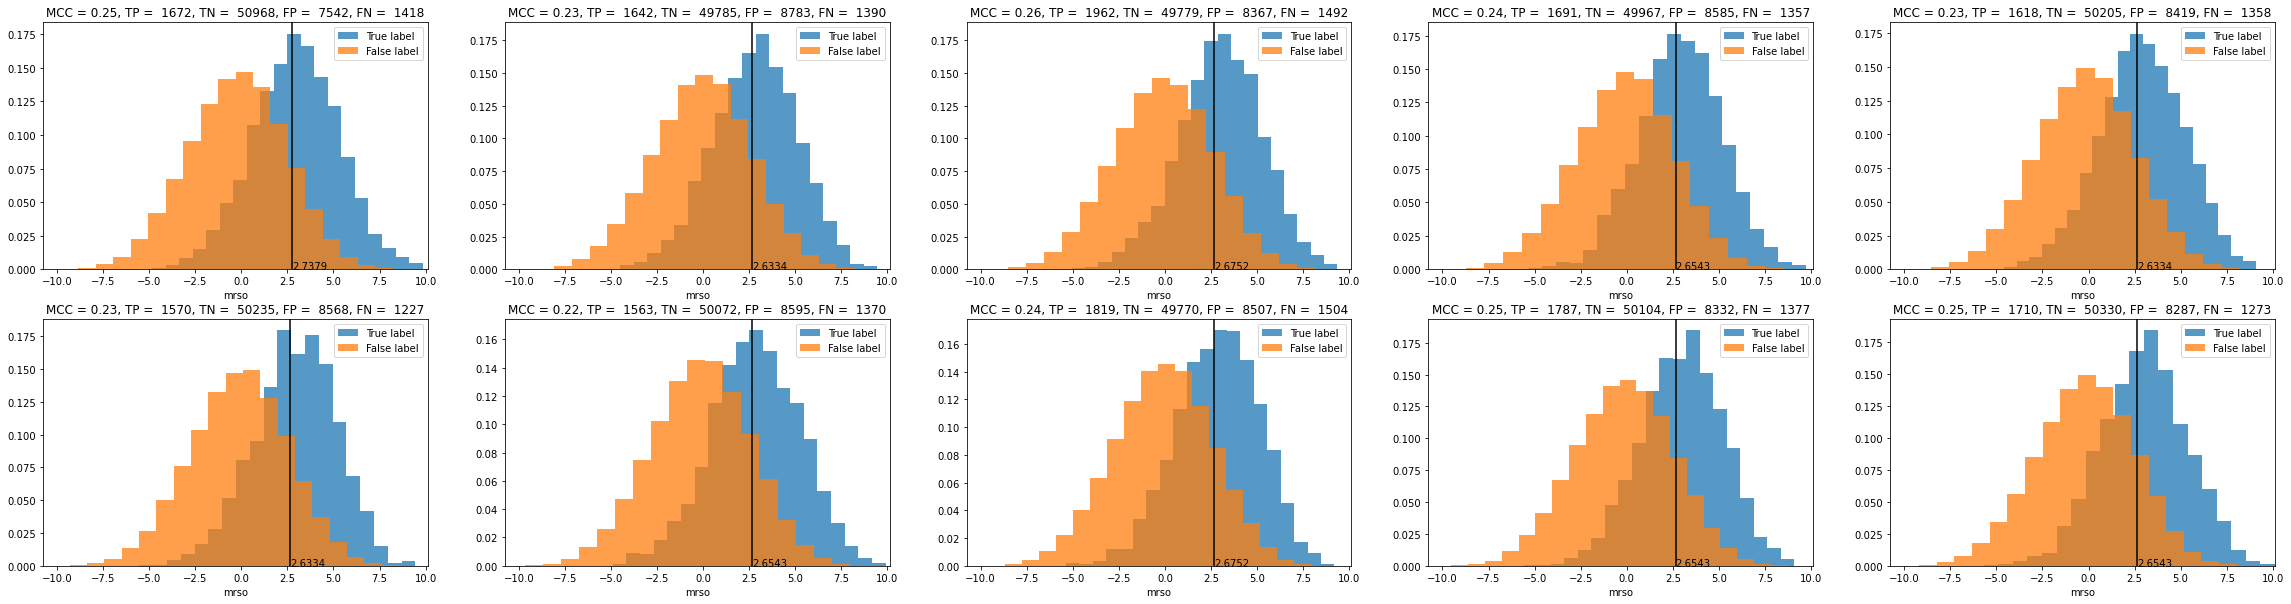

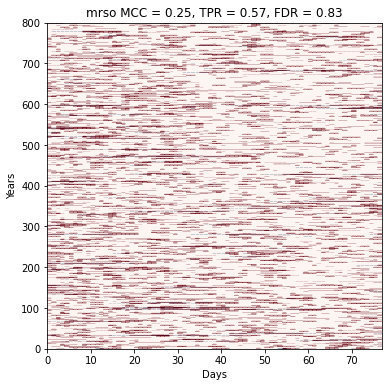

In [15]:
X = t2m.abs_area_int_reshape[:,np.newaxis]
Xname = 'mrso'
undersampling_factor = 10
labels = list_extremes
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)

Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,True)
        
        X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, undersampling_factor,True)# Split the data into training/testing sets
        #X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, 1,True)# Split the data into training/testing sets
        print(f'{type(X_train)= }, {type(X_test) = }, {type(Y_train) = }, {type(Y_test) = }, {type(X_train_new) = }, {type(Y_train_new) = }')
        print(f'{X_train.shape = }, {X_test.shape = }, {len(Y_train) = }, {len(Y_test) = }, {X_train_new.shape = }, {len(Y_train_new) = }')

        logreg = LogisticRegression(solver='liblinear')
        logreg.fit(X_train_new, Y_train_new)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)

        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)

        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 

        ax = fig2.add_subplot(spec2[j, k])
        PlotLogisticRegression(X,Xname,logreg,ax, X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
fig2.savefig("Images_Linear/logistic_regr_mrso_batch10.png", bbox_inches=full_extent(ax,.04).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
fig = plt.figure(figsize=(6,6))
plt.pcolormesh(np.array(Y_test).reshape(800,-1), cmap=plt.cm.Blues)
plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(800,-1), cmap=plt.cm.Reds,alpha=0.4)
plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
plt.xlabel('Days')
plt.ylabel('Years')

i:  0  , X_train.shape =  (554400, 2) , X_test.shape =  (61600, 2)  , a =  0  , b =  61600
Y_train positives =  27710 Y_train negatives =  526690  , Y_test positives =  3090  , Y_test negatives =  58510
loading Postproc/permutation_0_undersampling_10.npy
Y_train positives =  27710 Y_train negatives =  52669
type(X_train)= <class 'numpy.ndarray'>, type(X_test) = <class 'numpy.ndarray'>, type(Y_train) = <class 'list'>, type(Y_test) = <class 'list'>, type(X_train_new) = <class 'numpy.ndarray'>, type(Y_train_new) = <class 'list'>
X_train.shape = (554400, 2), X_test.shape = (61600, 2), len(Y_train) = 554400, len(Y_test) = 61600, X_train_new.shape = (80379, 2), len(Y_train_new) = 80379
Y_pred.shape = (61600,), Y_pred_prob.shape = (61600, 2)
MCC =  0.3274371897502863  , TP =  2017  , TN =  51441  , FP =  7069  , FN =  1073
MCC =  0.2064705950721805  , TP =  293  , TN =  58238  , FP =  272  , FN =  2797
renorm =  10 , MCC =  0.2064705950721805  ,entropy =  0.14716047092126494  ,entropy =  0.14

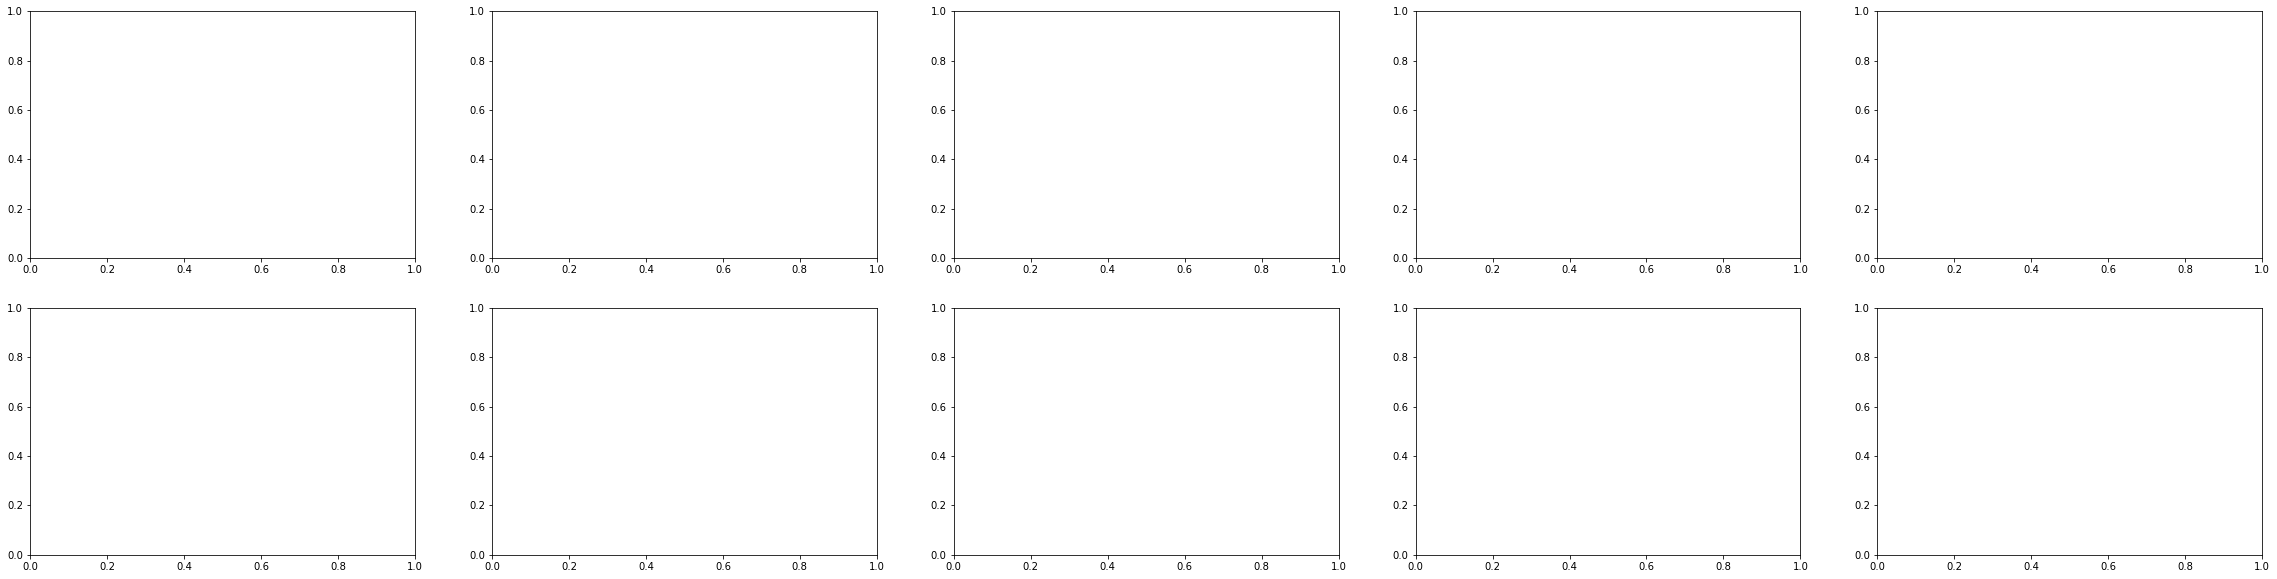

In [16]:
X = t2m.abs_area_int_reshape[:,np.newaxis]
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)
X = np.c_[t2m.abs_area_int_reshape[:,np.newaxis],mrso.abs_area_int_reshape[:,np.newaxis]]
Xname = 't2m_mrso'
Xname1 = ['mrso','t2m']
undersampling_factor = 10
labels = list_extremes
Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        X = np.c_[t2m.abs_area_int_reshape[:,np.newaxis],mrso.abs_area_int_reshape[:,np.newaxis]]
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,False)
        
        X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, undersampling_factor,True)# Split the data into training/testing sets
        #X_train, X_test, Y_train, Y_test, X_train_new, Y_train_new = TrainTestSplit(i,X, labels, 1,True)# Split the data into training/testing sets
        print(f'{type(X_train)= }, {type(X_test) = }, {type(Y_train) = }, {type(Y_test) = }, {type(X_train_new) = }, {type(Y_train_new) = }')
        print(f'{X_train.shape = }, {X_test.shape = }, {len(Y_train) = }, {len(Y_test) = }, {X_train_new.shape = }, {len(Y_train_new) = }')

        logreg = LogisticRegression(solver='liblinear')
        logreg.fit(X_train_new, Y_train_new)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)
        
        print(f'{Y_pred.shape = }, {Y_pred_prob.shape = }')

        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)

        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 
        
        ax = fig2.add_subplot(spec2[j, k])
#        Plot2DLogisticRegression(X,Xname1,logreg,ax,X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
#plt.subplots_adjust(hspace=0.5)        
#plt.show()
fig2.savefig("Images/logistic_regr_"+Xname+"_batch10.png", bbox_inches=full_extent(ax,.1).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
#plt.rcParams['pcolor.shading'] ='flat'
#fig = plt.figure(figsize=(6,6))
#plt.pcolormesh(np.array(Y_test).reshape(100,-1), cmap=plt.cm.Blues)
#plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(100,-1), cmap=plt.cm.Reds,alpha=0.4)
#plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
#plt.xlabel('Days')
#plt.ylabel('Years')


X_train.shape = (6930, 1), Y_train.shape = (6930,), X_test.shape = (770, 1), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0  , TP =  0  , TN =  735  , FP =  0  , FN =  35
MCC =  0  , TP =  0  , TN =  735  , FP =  0  , FN =  35
renorm =  1 , MCC =  0  ,entropy =  0.13865335067944273  ,entropy =  0.13865335067944273  , skill =  0.30154809100544805  ,BS =  0.036710263537122055  , WBS =  0.3161740231258465  , freq =  0.0
X_train.shape = (6930, 1), Y_train.shape = (6930,), X_test.shape = (770, 1), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.44394230391076883  , TP =  11  , TN =  726  , FP =  3  , FN =  30
MCC =  0.44394230391076883  , TP =  11  , TN =  726  , FP =  3  , FN =  30
renorm =  1 , MCC =  0.44394230391076883  ,entropy =  0.17126513420417167  ,entropy =  0.17126513420417167  , skill =  0.13726960550945264  ,BS =  0.04454441813679485  , WBS =  0.36181601666427243  , freq =  0.01818181818181818
X_train.shape 

ValueError: cannot reshape array of size 770 into shape (800,newaxis)

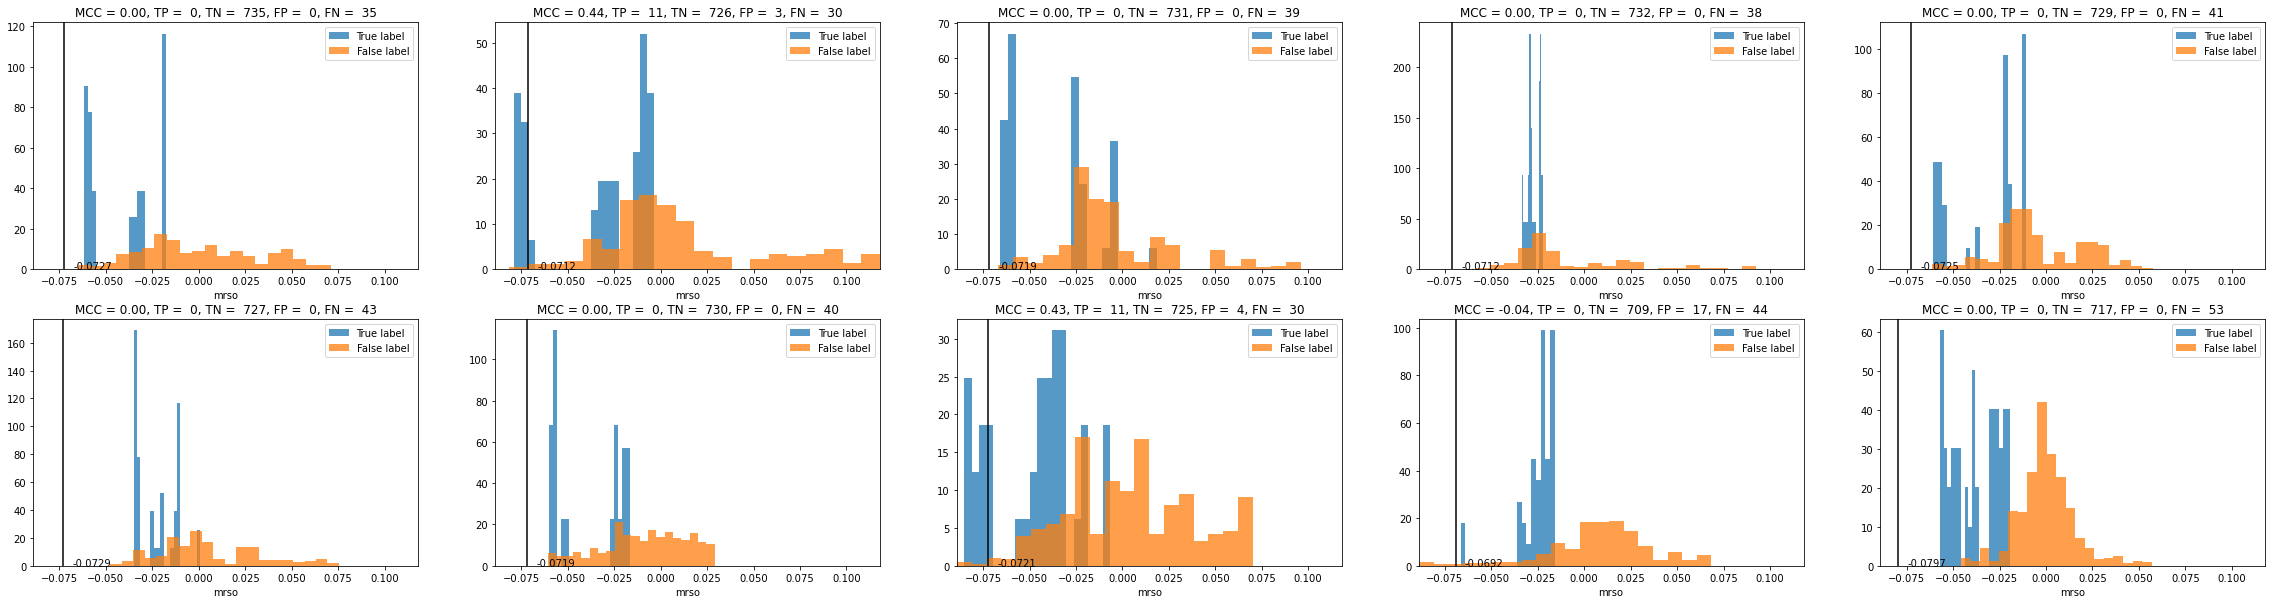

<Figure size 432x432 with 0 Axes>

In [18]:
X = mrso.abs_area_int_reshape[:100*77,np.newaxis]
Xname = 'mrso'
undersampling_factor = 1
labels = (np.array(list_extremes)[:100*77])
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)

Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,True)
        
        Xshape = X.shape
        lower = i*Xshape[0]//10   # select the lower bound
        upper = (i+1)*Xshape[0]//10 # select the upper bound
        test_indices = np.array(range(lower,upper))  # extract the test set which is between the lower and the upper bound
        # next we select the train set which is below the lower bound and above the uppder bound
        train_indices = np.array(list(range(lower))+list(range(upper,Xshape[0])))  # The indices of the train set (relative to the original set)
        
        X_train = X[train_indices]
        Y_train = labels[train_indices]
        X_test = X[test_indices]
        Y_test =labels[test_indices]
        
        print(f"{X_train.shape = }, {Y_train.shape = }, {X_test.shape = }, {Y_test.shape = }")

        logreg = LogisticRegression(solver='sag',C=1e5)
        logreg.fit(X_train, Y_train)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)
        print(f'{Y_pred.shape = }, {Y_pred_prob.shape = }')
        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)
        
        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 

        ax = fig2.add_subplot(spec2[j, k])
        PlotLogisticRegression(X,Xname,logreg,ax, X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
fig2.savefig("Images_Linear/logistic_regr_mrso_batch10.png", bbox_inches=full_extent(ax,.04).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
fig = plt.figure(figsize=(6,6))
plt.pcolormesh(np.array(Y_test).reshape(800,-1), cmap=plt.cm.Blues)
plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(800,-1), cmap=plt.cm.Reds,alpha=0.4)
plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
plt.xlabel('Days')
plt.ylabel('Years')

X_train.shape = (6930, 1), Y_train.shape = (6930,), X_test.shape = (770, 1), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.23385358667337133  , TP =  2  , TN =  735  , FP =  0  , FN =  33
MCC =  0.23385358667337133  , TP =  2  , TN =  735  , FP =  0  , FN =  33
renorm =  1 , MCC =  0.23385358667337133  ,entropy =  0.1457675917764261  ,entropy =  0.1457675917764261  , skill =  0.26571083751762276  ,BS =  0.03797051565987723  , WBS =  0.3493487884623593  , freq =  0.0025974025974025974
X_train.shape = (6930, 1), Y_train.shape = (6930,), X_test.shape = (770, 1), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.17086607701310372  , TP =  2  , TN =  728  , FP =  1  , FN =  39
MCC =  0.17086607701310372  , TP =  2  , TN =  728  , FP =  1  , FN =  39
renorm =  1 , MCC =  0.17086607701310372  ,entropy =  0.1789770716527067  ,entropy =  0.1789770716527067  , skill =  0.09842151848825319  ,BS =  0.04571713534268466  , WBS =  

ValueError: cannot reshape array of size 770 into shape (800,newaxis)

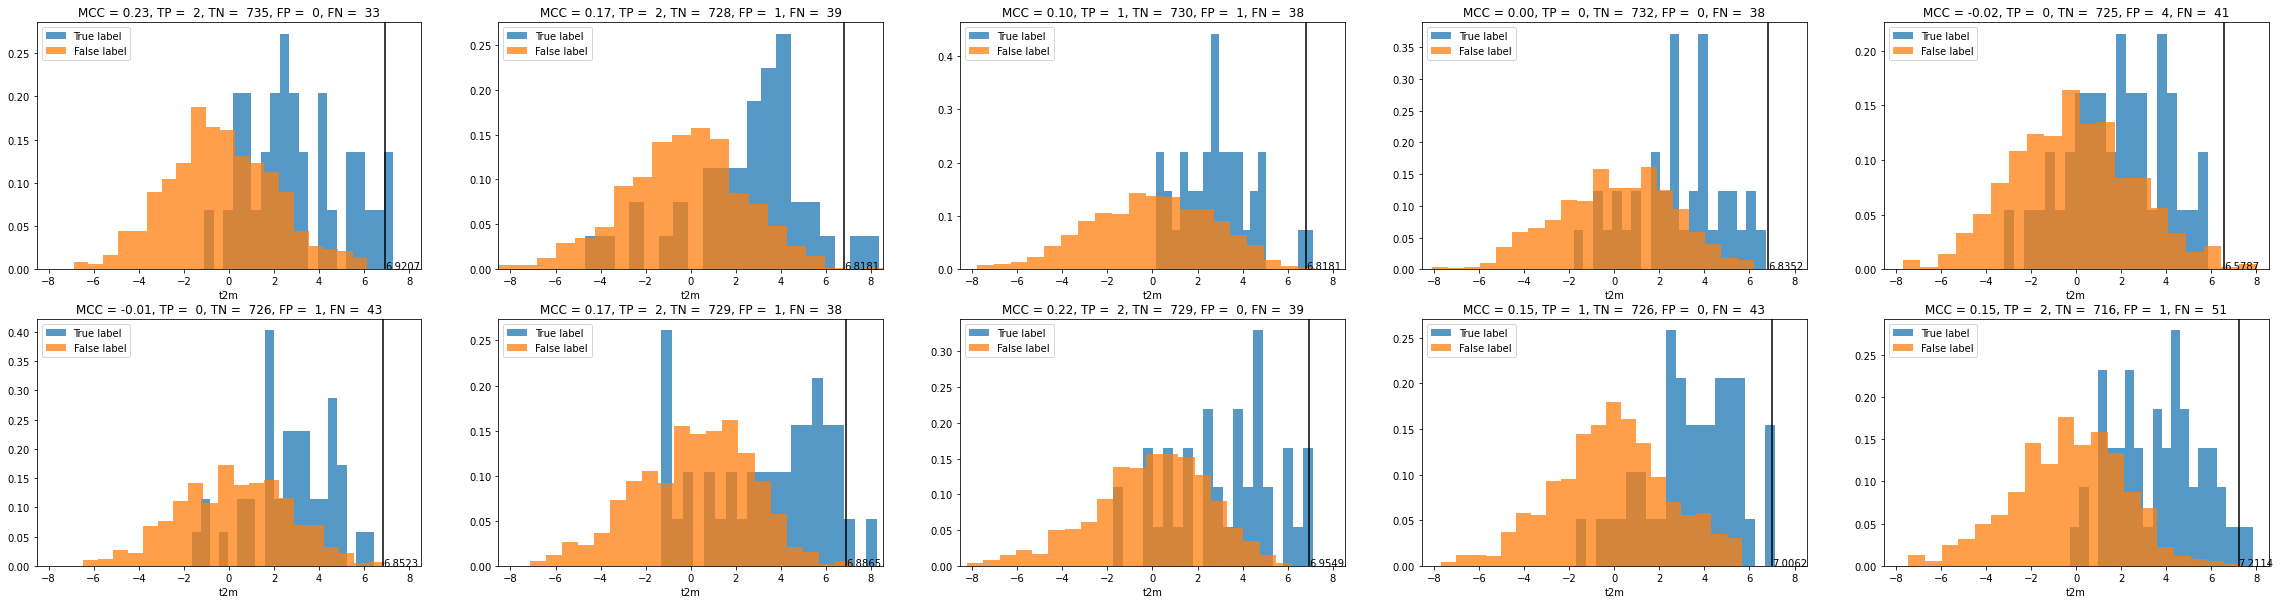

<Figure size 432x432 with 0 Axes>

In [19]:
X = t2m.abs_area_int_reshape[:100*77,np.newaxis]
Xname = 't2m'
undersampling_factor = 1
labels = (np.array(list_extremes)[:100*77])
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)

Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,True)
        
        Xshape = X.shape
        lower = i*Xshape[0]//10   # select the lower bound
        upper = (i+1)*Xshape[0]//10 # select the upper bound
        test_indices = np.array(range(lower,upper))  # extract the test set which is between the lower and the upper bound
        # next we select the train set which is below the lower bound and above the uppder bound
        train_indices = np.array(list(range(lower))+list(range(upper,Xshape[0])))  # The indices of the train set (relative to the original set)
        
        X_train = X[train_indices]
        Y_train = labels[train_indices]
        X_test = X[test_indices]
        Y_test =labels[test_indices]
        
        print(f"{X_train.shape = }, {Y_train.shape = }, {X_test.shape = }, {Y_test.shape = }")

        logreg = LogisticRegression(solver='sag',C=1e5)
        logreg.fit(X_train, Y_train)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)
        print(f'{Y_pred.shape = }, {Y_pred_prob.shape = }')
        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)
        
        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 

        ax = fig2.add_subplot(spec2[j, k])
        PlotLogisticRegression(X,Xname,logreg,ax, X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
fig2.savefig("Images_Linear/logistic_regr_mrso_batch10.png", bbox_inches=full_extent(ax,.04).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
fig = plt.figure(figsize=(6,6))
plt.pcolormesh(np.array(Y_test).reshape(800,-1), cmap=plt.cm.Blues)
plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(800,-1), cmap=plt.cm.Reds,alpha=0.4)
plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
plt.xlabel('Days')
plt.ylabel('Years')

Xshape = (7700, 2)
X_train.shape = (6930, 2), Y_train.shape = (6930,), X_test.shape = (770, 2), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.30755039444106236  , TP =  5  , TN =  733  , FP =  2  , FN =  30
MCC =  0.30755039444106236  , TP =  5  , TN =  733  , FP =  2  , FN =  30
renorm =  1 , MCC =  0.30755039444106236  ,entropy =  0.12675794210328792  ,entropy =  0.12675794210328792  , skill =  0.36146998101078875  ,BS =  0.035273284416694146  , WBS =  0.3064450038673302  , freq =  0.00909090909090909
Xshape = (7700, 2)
X_train.shape = (6930, 2), Y_train.shape = (6930,), X_test.shape = (770, 2), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.22105683831596923  , TP =  4  , TN =  726  , FP =  3  , FN =  37
MCC =  0.22105683831596923  , TP =  4  , TN =  726  , FP =  3  , FN =  37
renorm =  1 , MCC =  0.22105683831596923  ,entropy =  0.16128211437849072  ,entropy =  0.16128211437849072  , skill =  0.187558035039710

/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.14808147022321488  , TP =  2  , TN =  729  , FP =  2  , FN =  37
MCC =  0.14808147022321488  , TP =  2  , TN =  729  , FP =  2  , FN =  37
renorm =  1 , MCC =  0.14808147022321488  ,entropy =  0.1533270947773417  ,entropy =  0.1533270947773417  , skill =  0.2276306232554631  ,BS =  0.04142894249457817  , WBS =  0.33978111935445054  , freq =  0.005194805194805195
Xshape = (7700, 2)
X_train.shape = (6930, 2), Y_train.shape = (6930,), X_test.shape = (770, 2), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  -0.008216239454583022  , TP =  0  , TN =  731  , FP =  1  , FN =  38
MCC =  -0.008216239454583022  , TP =  0  , TN =  731  , FP =  1  , FN =  38
renorm =  1 , MCC =  -0.008216239454583022  ,entropy =  0.16276264411235505  ,entropy =  0.16276264411235505  , skill =  0.1801000196807349  ,BS =  0.043435188392540076  , WBS =  0.3625604715861987  , freq =  0.0012987012987012987
Xshape = (7700, 2)
X_

/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  -0.008770086007156131  , TP =  0  , TN =  726  , FP =  1  , FN =  43
MCC =  -0.008770086007156131  , TP =  0  , TN =  726  , FP =  1  , FN =  43
renorm =  1 , MCC =  -0.008770086007156131  ,entropy =  0.16813796445808235  ,entropy =  0.16813796445808235  , skill =  0.15302239956890357  ,BS =  0.04747253021636567  , WBS =  0.40634933456250655  , freq =  0.0012987012987012987
Xshape = (7700, 2)
X_train.shape = (6930, 2), Y_train.shape = (6930,), X_test.shape = (770, 2), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.3866555617495594  , TP =  8  , TN =  728  , FP =  2  , FN =  32
MCC =  0.3866555617495594  , TP =  8  , TN =  728  , FP =  2  , FN =  32
renorm =  1 , MCC =  0.3866555617495594  ,entropy =  0.15070816167575826  ,entropy =  0.15070816167575826  , skill =  0.2408232278002963  ,BS =  0.03867096839013038  , WBS =  0.2983851528709258  , freq =  0.012987012987012988
Xshape = (7700, 2)
X_t

/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.07441623965383767  , TP =  1  , TN =  724  , FP =  2  , FN =  43
MCC =  0.07441623965383767  , TP =  1  , TN =  724  , FP =  2  , FN =  43
renorm =  1 , MCC =  0.07441623965383767  ,entropy =  0.1535761531491162  ,entropy =  0.1535761531491162  , skill =  0.22637601747518762  ,BS =  0.04469026838030134  , WBS =  0.37139347158186936  , freq =  0.003896103896103896
Xshape = (7700, 2)
X_train.shape = (6930, 2), Y_train.shape = (6930,), X_test.shape = (770, 2), Y_test.shape = (770,)
Y_pred.shape = (770,), Y_pred_prob.shape = (770, 2)
MCC =  0.26578915343269205  , TP =  4  , TN =  717  , FP =  0  , FN =  49
MCC =  0.26578915343269205  , TP =  4  , TN =  717  , FP =  0  , FN =  49
renorm =  1 , MCC =  0.26578915343269205  ,entropy =  0.15097470698789725  ,entropy =  0.15097470698789725  , skill =  0.23948053336713085  ,BS =  0.04550862993512835  , WBS =  0.36143565099085767  , freq =  0.005194805194805195


/home/gmiloshe/miniconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Total MCC = 0.16686709324485202 +- 0.14430180315220195, New Skill = 0.2175058455907152 +- 0.0797319447447957


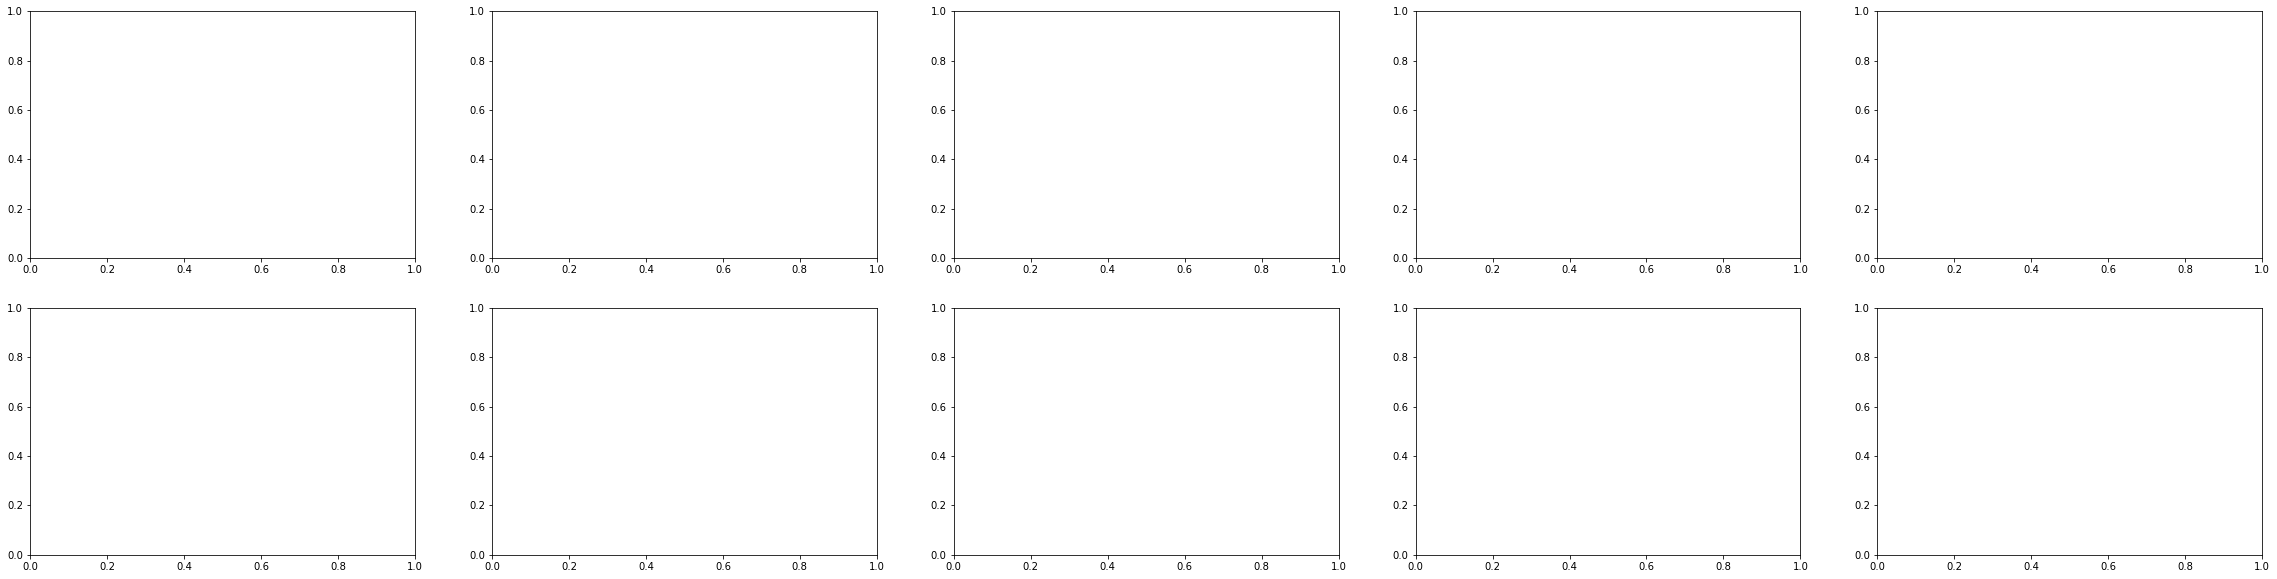

In [24]:
X = t2m.abs_area_int_reshape[:100*77,np.newaxis]
fig2 = plt.figure(figsize=(40, 10))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig2)
X = np.c_[t2m.abs_area_int_reshape[:100*77,np.newaxis],mrso.abs_area_int_reshape[:100*77,np.newaxis]]
Xname = 't2m_mrso'
Xname1 = ['mrso','t2m']
undersampling_factor = 1
labels = (np.array(list_extremes)[:100*77])
Tot_MCC = np.zeros(10,)
New_Skill = np.zeros(10,)
for j in range(2):
    for k in range(5):
        i = 5*j + k
        X = np.c_[t2m.abs_area_int_reshape[:100*77,np.newaxis],mrso.abs_area_int_reshape[:100*77,np.newaxis]]
        #X_test, X_train, Y_test, Y_train, logreg, Y_pred, TP, TN, FP, FN, Tot_MCC[i] = SingleLogisticRegression(i,X, labels, undersampling_factor,False)
        
        Xshape = X.shape
        print(f'{Xshape = }')
        lower = i*Xshape[0]//10   # select the lower bound
        upper = (i+1)*Xshape[0]//10 # select the upper bound
        test_indices = np.array(range(lower,upper))  # extract the test set which is between the lower and the upper bound
        # next we select the train set which is below the lower bound and above the uppder bound
        train_indices = np.array(list(range(lower))+list(range(upper,Xshape[0])))  # The indices of the train set (relative to the original set)
        
        X_train = X[train_indices]
        Y_train = labels[train_indices]
        X_test = X[test_indices]
        Y_test =labels[test_indices]
        
        print(f"{X_train.shape = }, {Y_train.shape = }, {X_test.shape = }, {Y_test.shape = }")

        logreg = LogisticRegression(solver='sag',C=1e5)
        logreg.fit(X_train, Y_train)
        Y_pred = logreg.predict(X_test) # confusion matrix works despite the fact that Y_test is True/False and Y_pred is 1/0
        Y_pred_prob = logreg.predict_proba(X_test)
        print(f'{Y_pred.shape = }, {Y_pred_prob.shape = }')
        TP, TN, FP, FN, Tot_MCC[i] = ComputeMCC(Y_test, Y_pred, True)

        new_MCC, new_entropy, New_Skill[i], new_BS, new_WBS, new_freq = ComputeMetrics(np.array(Y_test), Y_pred_prob, 5, reundersampling_factor=undersampling_factor) 
        
        ax = fig2.add_subplot(spec2[j, k])
#        Plot2DLogisticRegression(X,Xname1,logreg,ax,X_test, Y_test, TP, TN, FP, FN, Tot_MCC[i])
#plt.subplots_adjust(hspace=0.5)        
#plt.show()
fig2.savefig("Images/logistic_regr_"+Xname+"_batch10.png", bbox_inches=full_extent(ax,.1).transformed(fig2.dpi_scale_trans.inverted()))
print(f"Total MCC = {np.mean(Tot_MCC)} +- {np.std(Tot_MCC)}, New Skill = {np.mean(New_Skill)} +- {np.std(New_Skill)}")
#plt.rcParams['pcolor.shading'] ='flat'
#fig = plt.figure(figsize=(6,6))
#plt.pcolormesh(np.array(Y_test).reshape(100,-1), cmap=plt.cm.Blues)
#plt.pcolormesh(np.array(logreg.predict(X_test)).reshape(100,-1), cmap=plt.cm.Reds,alpha=0.4)
#plt.title(Xname+f' MCC = {Tot_MCC[9]:.2f}, TPR = {TP/(TP+FN):.2f}, FDR = {FP/(TP+FP):.2f}')
#plt.xlabel('Days')
#plt.ylabel('Years')
